In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import plot_gif

# 22956819

In [6]:
# Input file
fN = h5py.File("../22956819/22956819_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../22956819/22956819_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [3]:
# Get wells - data from timeseries_data, at position [2]
wells = ['A5', 'A6', 'A7', 'A8', 'B5', 'B6', 'B7', 'B8', 'C5', 'C6', 'C7', 'C8', 'D5', 'D6', 'D7', 'D8']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    #well_dict[well] = []
    if well in well_dict.keys():
        well_dict[well].append(i)

In [11]:
fN['fov_wells'][0]

(71, 799, 76, 804, b'D8', 1)

In [7]:
fN.keys()

<KeysViewHDF5 ['blob_features', 'coordinates', 'features_stats', 'fov_wells', 'fov_wells_backup', 'provenance_tracking', 'timeseries_data', 'trajectories_data']>

In [4]:
#import numpy as np

import masks

masks.make_well_masks(well='A5', traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../22956819/", sequential=True)


[1, 3, 40, 45, 46, 48, 49, 53, 55, 60, 65, 67, 68, 76, 78, 79, 80, 81, 83, 84, 86, 95, 96, 98, 99, 104, 120, 128, 129, 141, 151, 158, 162, 168, 184, 193, 196, 202, 204, 213, 219, 220, 229, 238, 247, 249, 252, 255, 258, 268, 270, 274, 280, 288, 292, 293, 296, 301, 302, 306, 308, 309, 316, 318, 320, 324, 334, 335, 338, 343, 354, 362, 365, 368, 370, 373, 377, 406, 436, 440, 442, 443, 454, 462, 475, 480, 499, 501, 506, 508, 509, 513, 515, 519, 522, 531, 534, 535, 540, 542, 543, 551, 552, 555, 556, 557, 563, 564, 566, 569, 585, 594, 682, 691, 714, 749, 794, 798, 865, 874, 939, 966, 969, 970, 987, 990, 992, 1059]
[0, 0, 575, 596, 601, 623, 641, 660, 668, 675, 693, 698, 706, 727, 772, 775, 781, 781, 788, 788, 800, 875, 888, 899, 909, 1044, 1123, 1185, 1197, 1250, 1311, 1375, 1384, 1400, 1500, 1575, 1584, 1681, 1687, 1775, 1825, 1825, 1851, 1901, 1962, 1972, 2000, 2025, 2029, 2087, 2094, 2101, 2114, 2139, 2150, 2150, 2161, 2169, 2169, 2205, 2233, 2245, 2300, 2307, 2315, 2325, 2362, 2372, 2376,

In [9]:
import raw

a5 = [2340, 2870, 2320, 2850]  # same as a1 in 22956814

raw.get_raw_well(a5, video_path='../22956819/22956819.mp4', well_name='A5', filename='../22956819/gif/A5_raw.npy')

-------- A5 --------


In [10]:
import psutil
psutil.virtual_memory()  # looks good!

svmem(total=439595151360, available=433386340352, percent=1.4, used=2833788928, free=424673591296, active=2935205888, inactive=10680098816, buffers=103964672, cached=11983806464, shared=9052160, slab=754585600)

In [2]:
import raw
raw.make_raw_videos('../22956819/gif/A5_raw.npy', '../22956819/A5_not_empty.txt', 'A5', output_dir='../22956819')

(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)


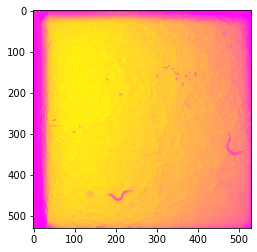

In [4]:
import gif

gif.plot_gif(np.load("../22956819/A5_raw_1.npy"), output_fn='../22956819/gif/A5_raw_1.gif')